# Maximum Likelihood vs Maximum A-posteriori

In this notebook, we compare estimating the weights ${\bf w}$ of a linear regression via ML and MAP

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.linalg import inv

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
np.set_printoptions(precision=5, suppress=True)

# 自分の例

In [32]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

[0.68421 0.      0.42105 0.26316 0.78947 0.21053 0.15789 0.36842 0.57895
 0.47368 0.05263 0.52632 0.63158 0.89474 1.      0.10526 0.84211 0.94737
 0.73684 0.31579]
[-0.51026  0.26901  0.43901  0.59074 -1.40191  0.97542  0.98097  1.21722
 -0.39999  0.67554  0.25286  0.43992 -0.47401 -0.32775 -0.51266  0.85431
 -0.7689  -0.00991 -1.16435  0.83963]


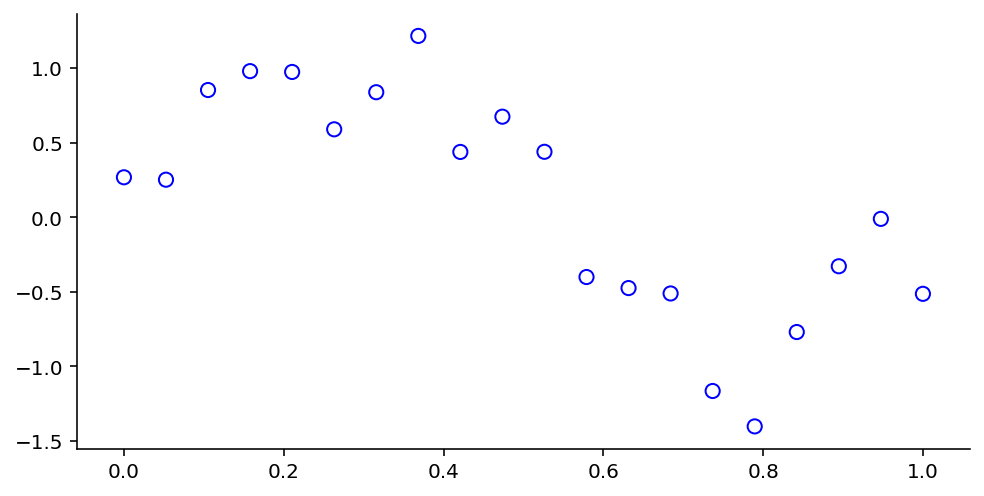

In [33]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 20, 0.3)
print(x_train)
print(y_train)
plt.scatter(x_train, y_train, facecolor='none', edgecolor='b', s=50, label='trainning data')

In [34]:
N, M = 20, 20

Phi = np.stack([x_train ** m for m in range(M)], axis=-1)

In [36]:
w_map = inv(α * np.eye(M) + Phi.T @ Phi) @ Phi.T @ y_train[:, None]
w_map

array([[ 0.56122],
       [-0.3906 ],
       [-0.52168],
       [-0.41567],
       [-0.28043],
       [-0.16494],
       [-0.07684],
       [-0.01314],
       [ 0.0312 ],
       [ 0.06084],
       [ 0.07958],
       [ 0.09033],
       [ 0.09527],
       [ 0.09602],
       [ 0.0938 ],
       [ 0.08949],
       [ 0.08375],
       [ 0.07707],
       [ 0.0698 ],
       [ 0.06222]])

In [37]:
w_ml = inv(Phi.T @ Phi) @ Phi.T @ y_train[:, None]
w_ml

array([[        0.40946],
       [      -47.30653],
       [      932.57137],
       [    -3723.03632],
       [   -61449.62597],
       [   889578.81007],
       [ -5434957.14079],
       [ 19256269.81881],
       [-41872914.6506 ],
       [ 53423604.22284],
       [-30577094.3969 ],
       [ -8182765.52044],
       [ 15399859.41304],
       [  7750228.06958],
       [-18943920.43615],
       [ 16317894.22421],
       [-21230844.30875],
       [ 23251524.80564],
       [-12549349.65218],
       [  2567171.86247]])

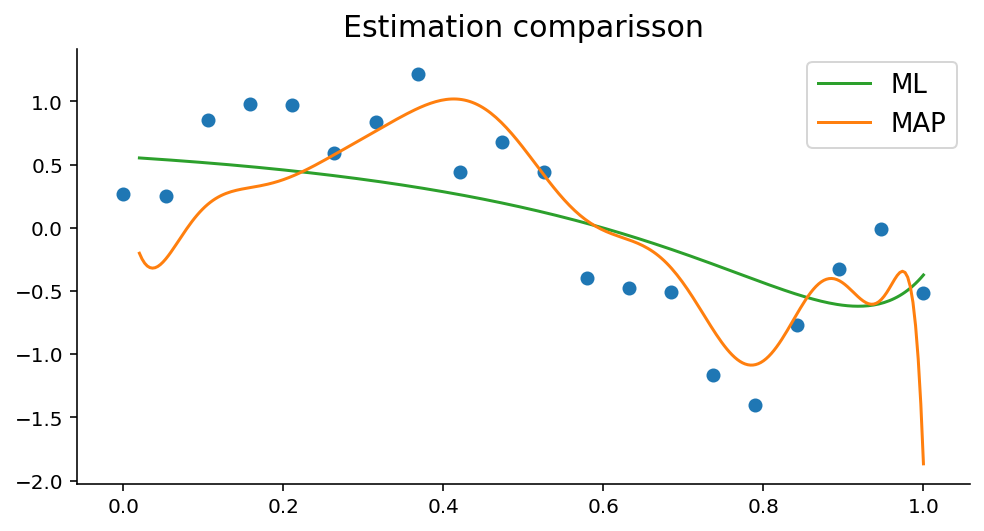

In [40]:
N_test = 300
x_test = np.linspace(0.02, 1, N_test)
Phi_test = np.stack([x_test ** m for m in range(M)], axis=-1)

t_map = np.ravel(Phi_test @ w_map)
t_ml = np.ravel(Phi_test @ w_ml)
plt.plot(x_test, t_map, label="ML", c="tab:green")
plt.plot(x_test, t_ml, label="MAP", c="tab:orange")
plt.scatter(x_train, y_train, c="tab:blue")
plt.title("Estimation comparisson", fontsize=15)
plt.legend(fontsize=13);

Font 'default' does not have a glyph for '\u63a8' [U+63a8], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5b9a' [U+5b9a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u63a8' [U+63a8], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5b9a' [U+5b9a], substituting with a dummy symbol.


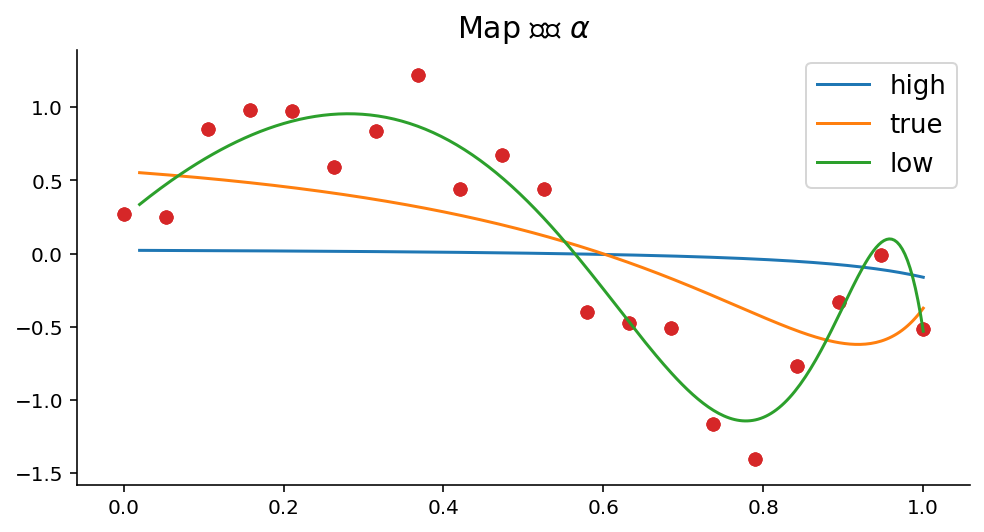

In [41]:
α_low = 0.0001
α_high = 100.5

w_map = inv(α * np.eye(M) + Phi.T @ Phi) @ Phi.T @ y_train[:, None]
w_map_high = inv(α_high * np.eye(M) + Phi.T @ Phi) @ Phi.T @ y_train[:, None]
w_map_low = inv(α_low * np.eye(M) + Phi.T @ Phi) @ Phi.T @ y_train[:, None]
w_list = [w_map_high, w_map, w_map_low]
labels = ['high', 'true', 'low']
for w, label in zip(w_list, labels):
    t_map = np.ravel(Phi_test @ w)
    plt.plot(x_test, t_map, label=label)
    plt.scatter(x_train, y_train, c='tab:red')
plt.legend(fontsize=13)
plt.title(r'Map 推定 $\alpha$', fontsize=15);

# 元の例

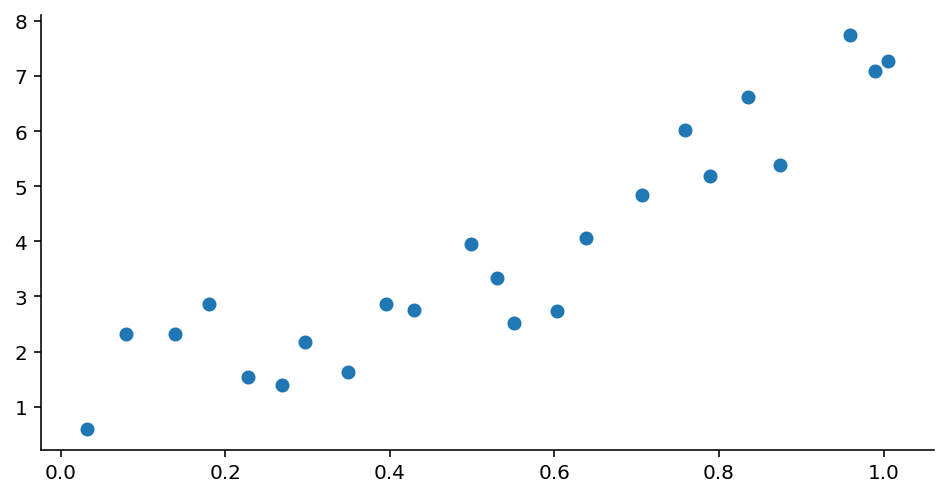

In [43]:
seed(31415)
N, M = 23, 23
α = 1.3
x = np.linspace(0, 1, N) + np.random.rand(N) * 0.05
t = 3 * x + 2.3 * x ** 2 + 1.2 + np.random.randn(N) / α
Phi = np.stack([x ** m for m in range(M)], axis=-1)

plt.scatter(x, t)

In [44]:
w_map = inv(α * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_map

array([[ 1.63449],
       [ 1.61549],
       [ 1.29817],
       [ 1.0188 ],
       [ 0.78747],
       [ 0.60237],
       [ 0.45591],
       [ 0.34001],
       [ 0.24787],
       [ 0.17416],
       [ 0.11476],
       [ 0.06652],
       [ 0.02699],
       [-0.00571],
       [-0.03305],
       [-0.05615],
       [-0.0759 ],
       [-0.09298],
       [-0.10791],
       [-0.12111],
       [-0.13291],
       [-0.14356],
       [-0.15326]])

In [45]:
w_ml = inv(Phi.T @ Phi) @ Phi.T @ t[:, None]
w_ml

array([[      -1.07407],
       [    -190.55837],
       [    3929.87405],
       [  -43679.87473],
       [  326867.11486],
       [-1460263.92381],
       [ 3537876.69836],
       [-3309064.07169],
       [-3173593.46862],
       [ 8042278.9963 ],
       [  688598.78089],
       [-6848733.16958],
       [-8402968.31038],
       [15329784.96859],
       [ 2967751.81372],
       [-9675845.81991],
       [ 1188006.27648],
       [ 1551045.01534],
       [-9231166.88249],
       [12950148.81251],
       [  559647.31534],
       [-8198078.01508],
       [ 3197648.51061]])

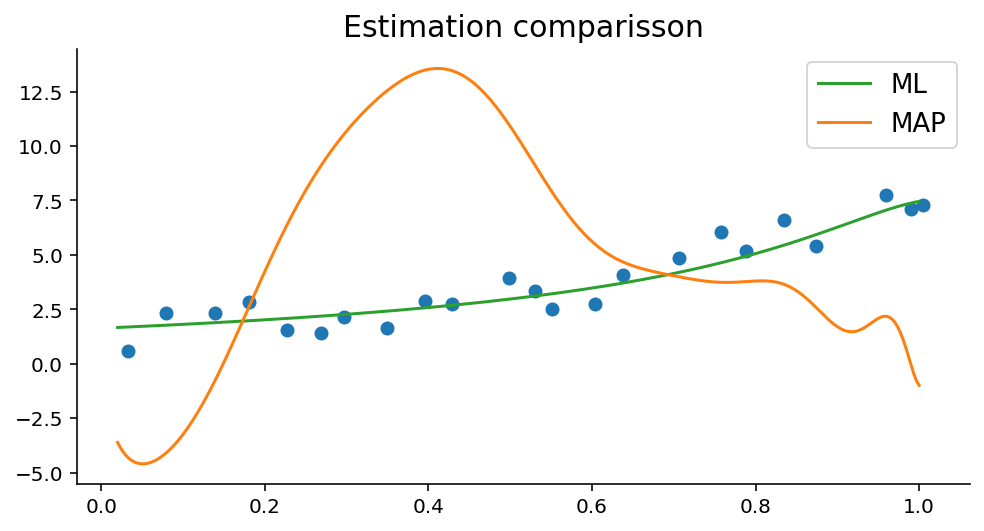

In [46]:
N_test = 300
x_test = np.linspace(0.02, 1, N_test)
Phi_test = np.stack([x_test ** m for m in range(M)], axis=-1)

t_map = np.ravel(Phi_test @ w_map)
t_ml = np.ravel(Phi_test @ w_ml)
plt.plot(x_test, t_map, label="ML", c="tab:green")
plt.plot(x_test, t_ml, label="MAP", c="tab:orange")
plt.scatter(x, t, c="tab:blue")
plt.title("Estimation comparisson", fontsize=15)
plt.legend(fontsize=13);

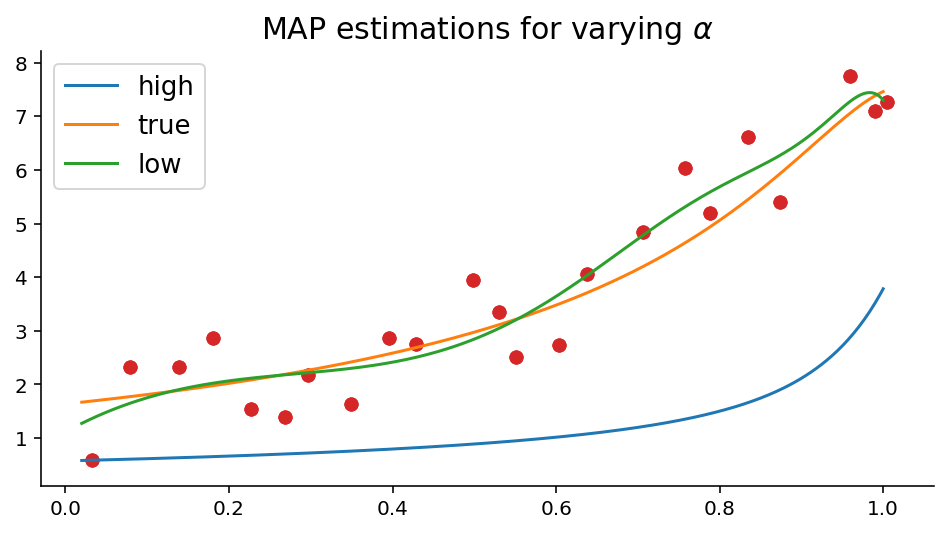

In [47]:
α_low = 0.0001
α_high = 100.5

w_map = inv(α * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_map_high = inv(α_high * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_map_low = inv(α_low * np.eye(M) + Phi.T @ Phi) @ Phi.T @ t[:, None]
w_list = [w_map_high, w_map, w_map_low]
labels = ["high", "true", "low"]
for w, label in zip(w_list, labels):
    t_map = np.ravel(Phi_test @ w)
    plt.plot(x_test, t_map, label=label)
    plt.scatter(x, t, c="tab:red")
plt.legend(fontsize=13)
plt.title(r"MAP estimations for varying $\alpha$", fontsize=15);

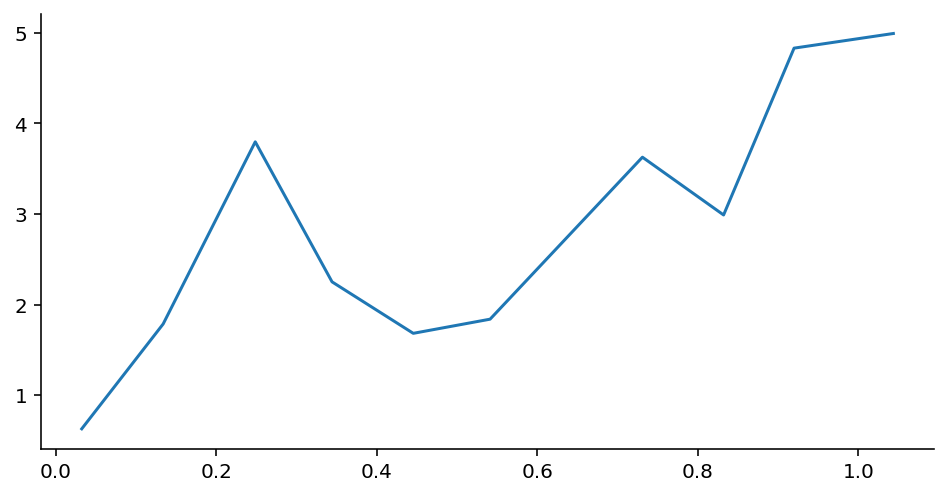

In [49]:
seed(31415)
N, M = 11, 11
α = 1.3
x = np.linspace(0, 1, N) + np.random.rand(N) * 0.05
t = 3 * x + 1.2 + np.random.randn(N) / α
Phi = np.stack([x ** m for m in range(M)], axis=-1)

plt.plot(x, t)

In [50]:
np.linalg.det(Phi.T @ Phi)

1.7735983698552673e-55

In [51]:
np.linalg.matrix_rank(Phi.T @ Phi)

10

In [52]:
np.linalg.eigvals(Phi.T @ Phi)

array([29.05262,  6.91538,  0.80405,  0.06404,  0.00329,  0.00012,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ])

In [53]:
w_ml = inv(Phi.T @ Phi) @ Phi.T @ t[:, None]
w_ml

array([[      16.02532],
       [    -794.97361],
       [   12163.27949],
       [  -86344.07533],
       [  345847.6141 ],
       [ -849659.88253],
       [ 1317635.1164 ],
       [-1276693.65707],
       [  732244.31071],
       [ -217550.37786],
       [   23147.00101]])